In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [83]:
df = pd.read_csv('train.csv')

Min Max AVG

In [84]:
# ENGINE __________________________________________________

df['engine_capacity'] = df['engine_capacity'].str.replace('cc', '')

df = df.astype({
    'engine_capacity': float,
})


min = df['engine_capacity'].min()
max = df['engine_capacity'].max()
mean = df['engine_capacity'].mean()


print("Min: " ,min)
print("Max: ", max)
print("Media: ", mean)

Min:  0.0
Max:  5998.0
Media:  1423.1701441170144


In [85]:
# KMS __________________________________________________

df['kms_driven'] = df['kms_driven'].str.replace('Kms', '')
df['kms_driven'] = df['kms_driven'].str.replace(',', '').str.strip()

df = df.astype({
    'kms_driven': float,
})

min = df['kms_driven'].min()
max = df['kms_driven'].max()
mean = df['kms_driven'].mean()


print("Min: " ,min)
print("Max: ", max)
print("Media: ", mean)


Min:  286.0
Max:  1200000.0
Media:  58180.675696982726


In [86]:
# MAX POWER __________________________________________________
#convert to bhp
Correct_Max_Power = []
for power in df['max_power']:
    if pd.notna(power):
        if isinstance(power, str):
            if 'bhp' in power:
                num_bhp = float(re.search(r'\d+.?\d', power).group())
                Correct_Max_Power.append(num_bhp)
            elif 'PS' in power:
                num_ps = float(re.search(r'\d+.?\d', power).group())
                num_bhp = round(num_ps * 0.98632, 2)
                Correct_Max_Power.append(num_bhp)
            else:
                num = re.search(r'\d+\.?\d*', power)
                Correct_Max_Power.append(float(num.group()) if num else None)
        else:
            Correct_Max_Power.append(power)
    else:
        Correct_Max_Power.append(None)


# Convert not NaN to float
Correct_Max_Power = [float(value) if value is not None else value for value in Correct_Max_Power]

df['max_power'] = Correct_Max_Power

df = df.astype({
    'max_power': float,
})

min = df['max_power'].min()
max = df['max_power'].max()
mean = df['max_power'].mean()


print("Min: " ,min)
print("Max: ", max)
print("Media: ", mean)

Min:  25.4
Max:  558.0
Media:  103.88974615994809


In [87]:
# SEATS  __________________________________________________

min = df['seats'].min()
max = df['seats'].max()
mean = df['seats'].mean()


print("Min: " ,min)
print("Max: ", max)
print("Media: ", mean)

Min:  2.0
Max:  10.0
Media:  5.2020933400243745


In [88]:
#MILEAGE_____________________________________________________

#assign value to blank lines
df['mileage'] = df['mileage'].fillna(0)

df = df[df['mileage'].notna()]
consumo_correto = []

for i in df['mileage']:
    match = re.search(r'(\d+.\d+|\d+)', str(i))  # Encontrar números (com ou sem ponto decimal)

    if match:
        valor = float(match.group())

        if 'km/kg' in str(i):
            valor *= 1.40  # Converter de km/kg para kmpl

        consumo_correto.append(valor)

df['mileage'] = consumo_correto

df = df.astype({
    'mileage': float,
})

min = df['mileage'].min()
max = df['mileage'].max()
mean = df['mileage'].mean()


print("Min: " ,min)
print("Max: ", max)
print("Media: ", mean)

Min:  0.0
Max:  140.0
Media:  18.92554378045285


In [89]:
#PRICE___________________________________________________

min = df['resale_price_Lakh'].min()
max = df['resale_price_Lakh'].max()
mean = df['resale_price_Lakh'].mean()


print("Min: " ,min)
print("Max: ", max)
print("Media: ", mean)


Min:  0.28
Max:  225.0
Media:  8.845202874032676


Blanks e Linhas

In [90]:
df.isna().sum()

full_name             0
registered_year      54
engine_capacity       9
insurance             5
transmission_type     0
kms_driven            3
owner_type           36
fuel_type             0
max_power            89
seats                 7
mileage               0
body_type             0
city                  0
resale_price_Lakh     0
dtype: int64

In [91]:
df.shape

(13956, 14)

Valores

In [92]:
df["full_name"].nunique()

6063

In [93]:
df["insurance"].unique()

array(['Third Party', 'Zero Dep', 'Third Party insurance',
       'Comprehensive', 'Not Available', '1', '2', nan], dtype=object)

In [94]:
df["transmission_type"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [95]:
df["owner_type"].unique()

array(['First Owner', 'Third Owner', 'Second Owner', 'Fifth Owner',
       'Fourth Owner', nan], dtype=object)

In [96]:
df["fuel_type"].unique()

array(['Petrol', 'Diesel', 'CNG', 'Electric', 'LPG'], dtype=object)

In [97]:
df["body_type"].unique()

array(['Hatchback', 'SUV', 'Sedan', 'BMW', 'MUV', 'Maruti', 'Minivans',
       'Mercedes-Benz', 'Cars', 'Coupe', 'Jaguar', 'Wagon', 'Datsun',
       'Pickup', 'Tata', 'Honda', 'Convertibles', 'Hyundai', 'Mahindra',
       'Volvo', 'Toyota', 'Isuzu', 'Skoda', 'Chevrolet'], dtype=object)

In [98]:
df["city"].unique()

array(['Pune', 'Jaipur', 'Mumbai', 'Kolkata', 'Delhi', 'Bangalore',
       'Hyderabad', 'Chennai', 'Gurgaon', 'Chandigarh', 'Ahmedabad',
       'Lucknow', 'Agra'], dtype=object)

Processamento base

In [99]:
df.loc[df["insurance"] == "Third Party insurance","insurance"] = "Third Party"
df.loc[df["insurance"] == "1","insurance"] = "First"
df.loc[df["insurance"] == "2","insurance"] = "Second"
df.loc[df["insurance"] == "Not Available","insurance"] = np.nan
df["insurance"] = df["insurance"].fillna(df["insurance"].mode()[0])

In [100]:
df["marca"] = df["full_name"].apply(lambda x : x.split()[1])

In [101]:
df["registered_year"] = df["full_name"].str.split().apply(lambda x : int(x[0]))

In [102]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
registered_year,13956.0,2016.303310,3.736954,1985.00,2014.0000,2017.00,2019.00,2023.0
engine_capacity,13947.0,1423.170144,479.460107,0.00,1197.0000,1248.00,1498.00,5998.0
kms_driven,13953.0,58180.675697,36636.596899,286.00,32000.0000,54907.00,79265.00,1200000.0
max_power,13867.0,103.889746,45.283052,25.40,78.9000,88.50,118.30,558.0
seats,13949.0,5.202093,0.662253,2.00,5.0000,5.00,5.00,10.0
mileage,13956.0,18.925544,5.716199,0.00,16.8000,18.90,21.50,140.0
resale_price_Lakh,13956.0,8.845203,11.145440,0.28,3.7575,5.82,9.07,225.0


Visualizações

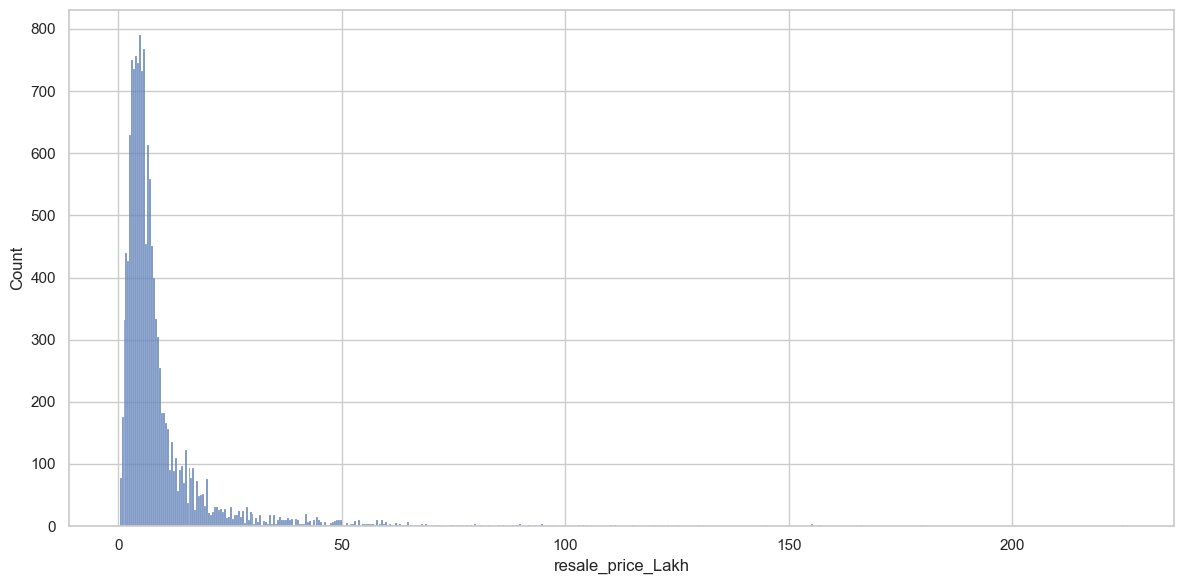

In [103]:

plt.figure(figsize=(12,6))
sns.histplot(x = df["resale_price_Lakh"])
plt.tight_layout()

C:\Users\letic\AppData\Local\Temp\ipykernel_20392\3233326078.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(x=df["registered_year"], palette=palette)


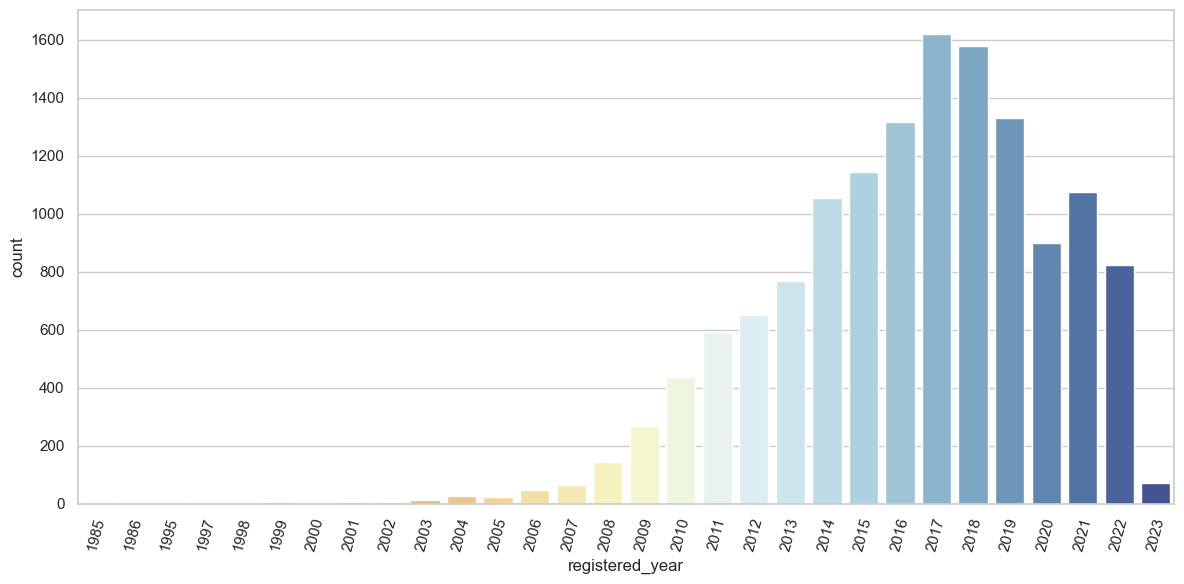

In [104]:
num_colors = len(df["registered_year"].unique())
palette = sns.color_palette("RdYlBu", n_colors=num_colors)


plt.figure(figsize=(12, 6))
a = sns.countplot(x=df["registered_year"], palette=palette)
a.tick_params(axis='x', rotation=75)
plt.tight_layout()


plt.show()


C:\Users\letic\AppData\Local\Temp\ipykernel_20392\1847237117.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(x=df["marca"], palette=palette)


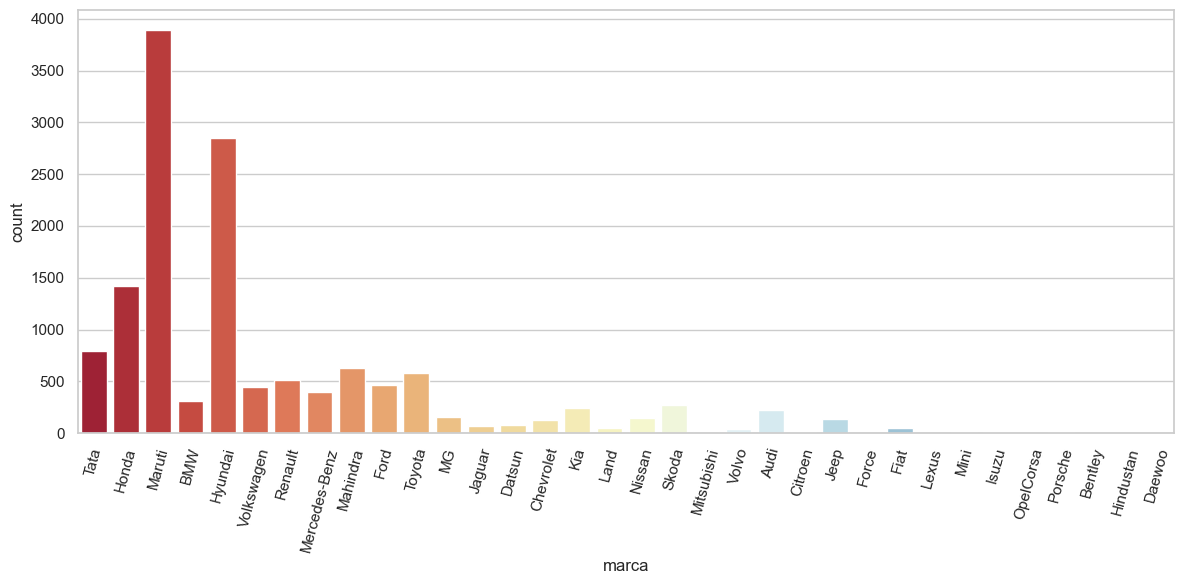

In [105]:
num_colors = len(df["marca"].unique())
palette = sns.color_palette("RdYlBu", n_colors=num_colors)


plt.figure(figsize=(12, 6))
a = sns.countplot(x=df["marca"], palette=palette)
a.tick_params(axis='x', rotation=75)
plt.tight_layout()


plt.show()

C:\Users\letic\AppData\Local\Temp\ipykernel_20392\2598353673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=car_df["marca"],y=car_df["sum"],ax=ax[0],palette="RdYlBu")
C:\Users\letic\AppData\Local\Temp\ipykernel_20392\2598353673.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=car_df["marca"],y=car_df["mean"],ax=ax[1],palette="RdYlBu")


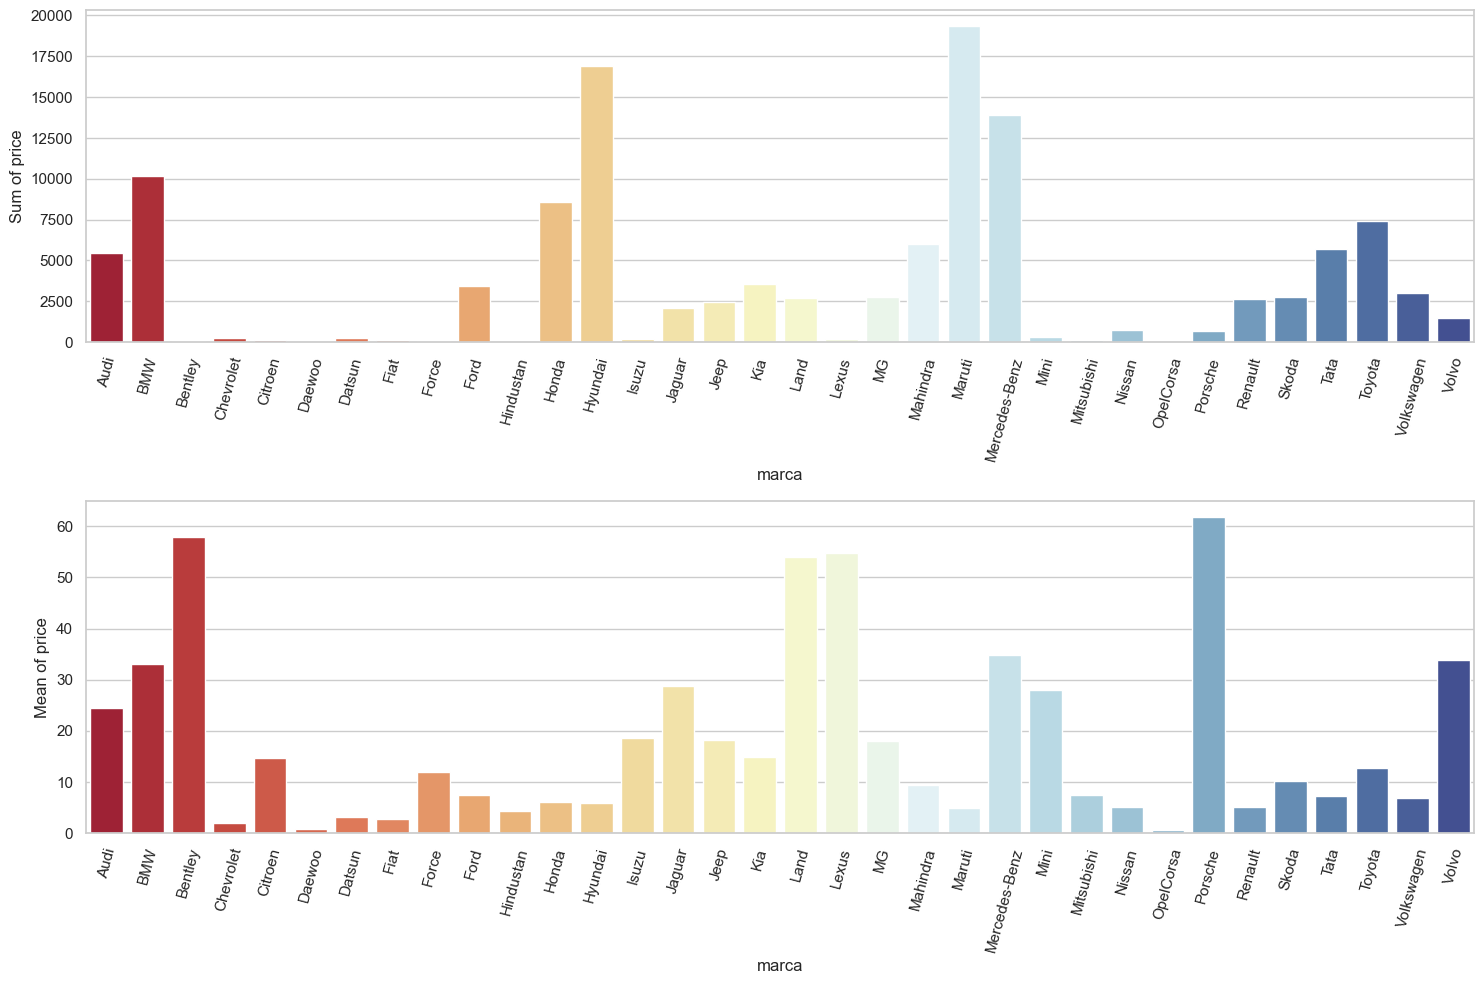

In [106]:
car_df = df.groupby("marca")["resale_price_Lakh"].agg(["mean","sum"]).reset_index()
fig , ax = plt.subplots(2,1,figsize = (15,10))
ax1 = sns.barplot(x=car_df["marca"],y=car_df["sum"],ax=ax[0],palette="RdYlBu")
ax1.set_ylabel("Sum of price")
ax1.tick_params(axis='x', rotation=75)
ax2 = sns.barplot(x=car_df["marca"],y=car_df["mean"],ax=ax[1],palette="RdYlBu")
ax2.set_ylabel("Mean of price")
ax2.tick_params(axis='x', rotation=75)
plt.tight_layout()

C:\Users\letic\AppData\Local\Temp\ipykernel_20392\3242498461.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(x = df["insurance"],palette="RdYlBu")


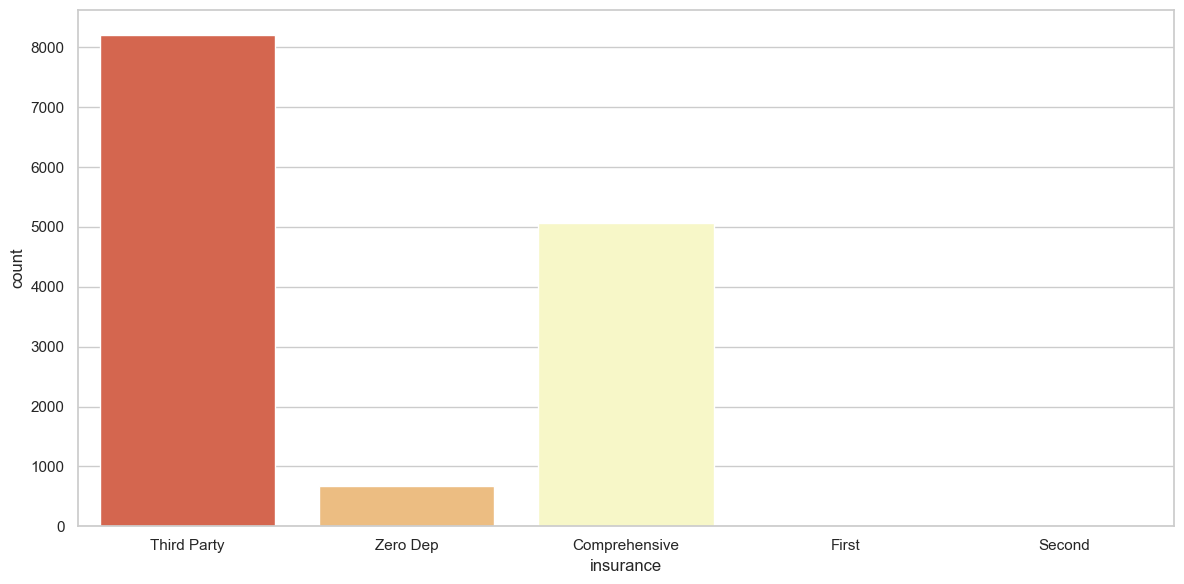

In [107]:
plt.figure(figsize=(12,6))
a = sns.countplot(x = df["insurance"],palette="RdYlBu")
plt.tight_layout()

C:\Users\letic\AppData\Local\Temp\ipykernel_20392\1267271880.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=insu_df["insurance"],y=insu_df["sum"],ax=ax[0],palette="RdYlBu")
C:\Users\letic\AppData\Local\Temp\ipykernel_20392\1267271880.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=insu_df["insurance"],y=insu_df["mean"],ax=ax[1],palette="RdYlBu")


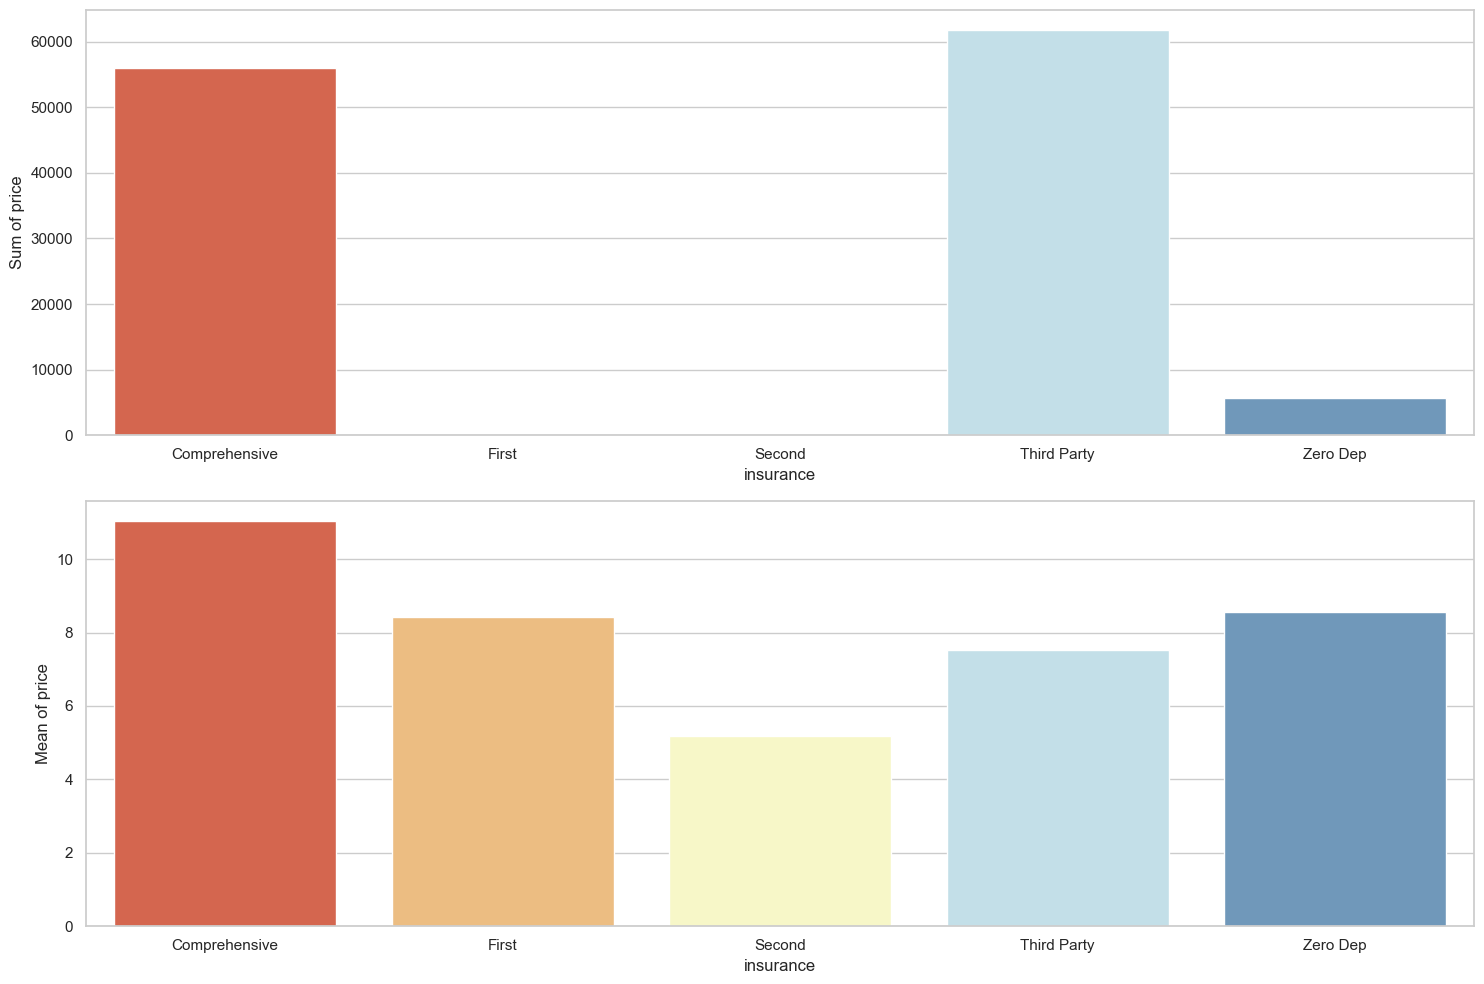

In [108]:
insu_df = df.groupby("insurance")["resale_price_Lakh"].agg(["mean","sum"]).reset_index()
fig , ax = plt.subplots(2,1,figsize = (15,10))
ax1 = sns.barplot(x=insu_df["insurance"],y=insu_df["sum"],ax=ax[0],palette="RdYlBu")
ax1.set_ylabel("Sum of price")
ax2 = sns.barplot(x=insu_df["insurance"],y=insu_df["mean"],ax=ax[1],palette="RdYlBu")
ax2.set_ylabel("Mean of price")
plt.tight_layout()

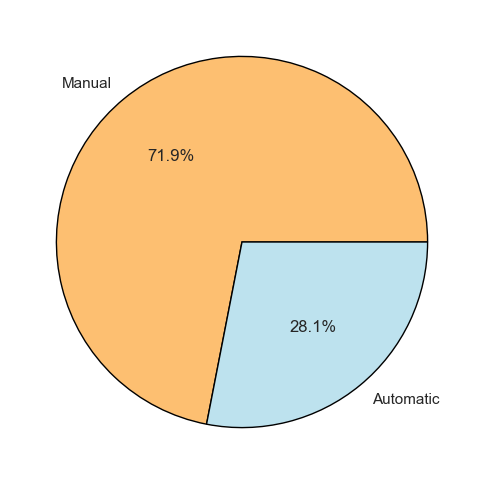

In [109]:

num_colors = len(df["transmission_type"].unique())
palette = sns.color_palette("RdYlBu", n_colors=num_colors)

plt.figure(figsize=(8, 5))
trans_dict = dict(df["transmission_type"].value_counts())
plt.pie(trans_dict.values(), labels=trans_dict.keys(), wedgeprops={"edgecolor": "black"}, autopct="%1.1f%%", colors=palette)
plt.tight_layout()

plt.show()


C:\Users\letic\AppData\Local\Temp\ipykernel_20392\1804237566.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=trans_df["transmission_type"], y=trans_df["sum"], ax=ax[0], palette=palette)
C:\Users\letic\AppData\Local\Temp\ipykernel_20392\1804237566.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=trans_df["transmission_type"], y=trans_df["mean"], ax=ax[1], palette=palette)


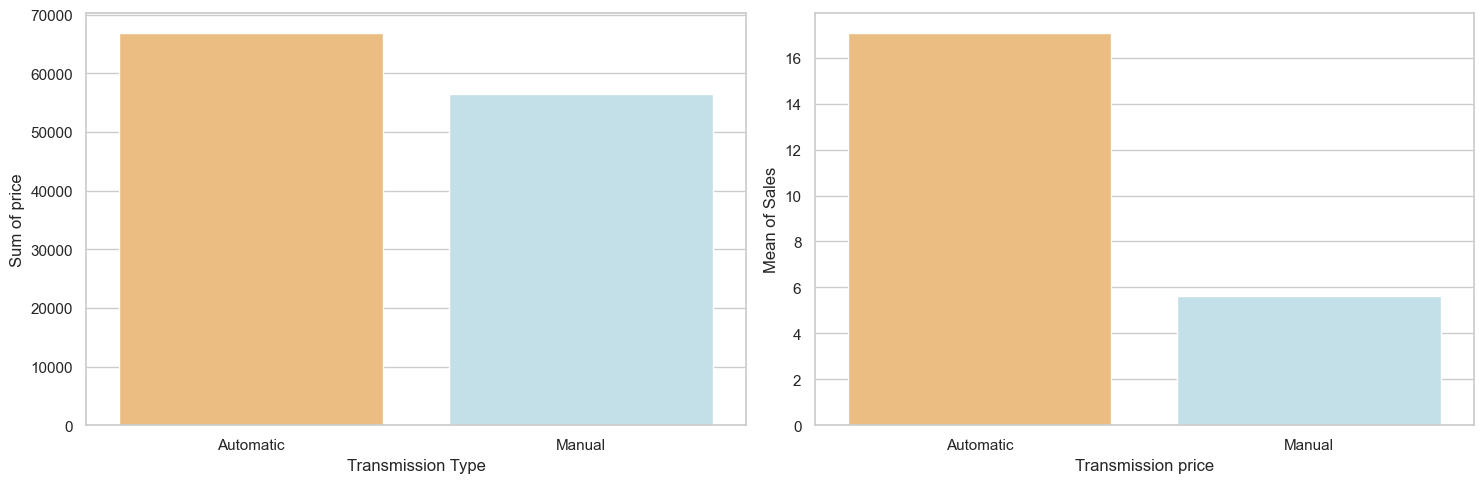

In [110]:
trans_df = df.groupby("transmission_type")["resale_price_Lakh"].agg(["mean", "sum"]).reset_index()

num_colors = len(trans_df["transmission_type"].unique())
palette = sns.color_palette("RdYlBu", n_colors=num_colors)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax1 = sns.barplot(x=trans_df["transmission_type"], y=trans_df["sum"], ax=ax[0], palette=palette)
ax1.set_ylabel("Sum of price")
ax1.set_xlabel("Transmission Type")

ax2 = sns.barplot(x=trans_df["transmission_type"], y=trans_df["mean"], ax=ax[1], palette=palette)
ax2.set_ylabel("Mean of Sales")
ax2.set_xlabel("Transmission price")


plt.tight_layout()
plt.show()


C:\Users\letic\AppData\Local\Temp\ipykernel_20392\2415352332.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(x = df["owner_type"],palette="RdYlBu")


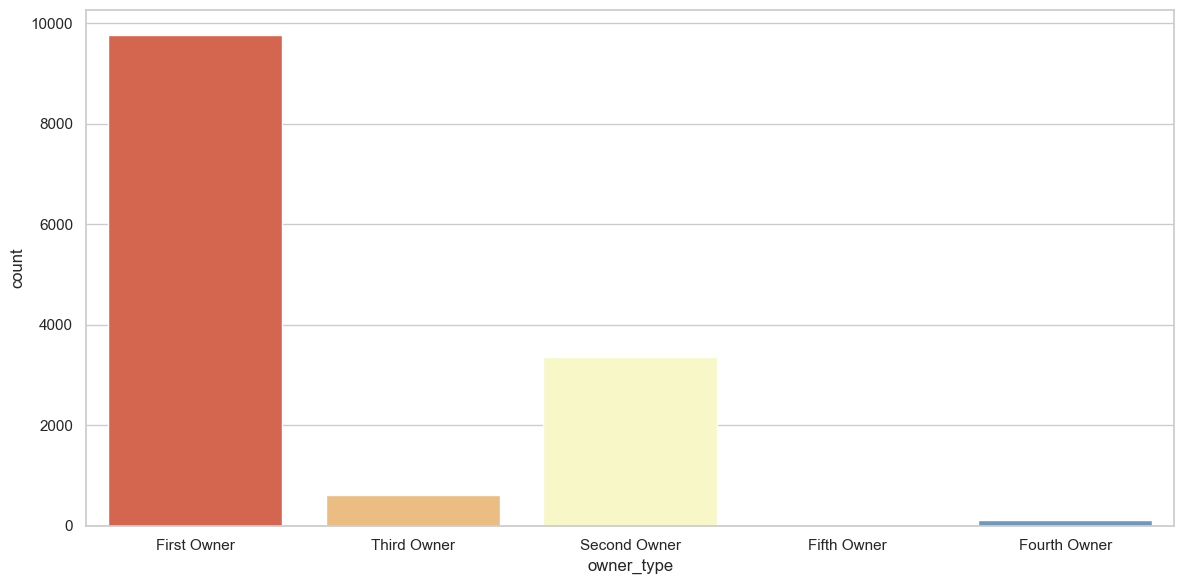

In [111]:
plt.figure(figsize=(12,6))
a = sns.countplot(x = df["owner_type"],palette="RdYlBu")
plt.tight_layout()

C:\Users\letic\AppData\Local\Temp\ipykernel_20392\1374633040.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=insu_df["owner_type"],y=insu_df["sum"],ax=ax[0],palette="RdYlBu")
C:\Users\letic\AppData\Local\Temp\ipykernel_20392\1374633040.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=insu_df["owner_type"],y=insu_df["mean"],ax=ax[1],palette="RdYlBu")


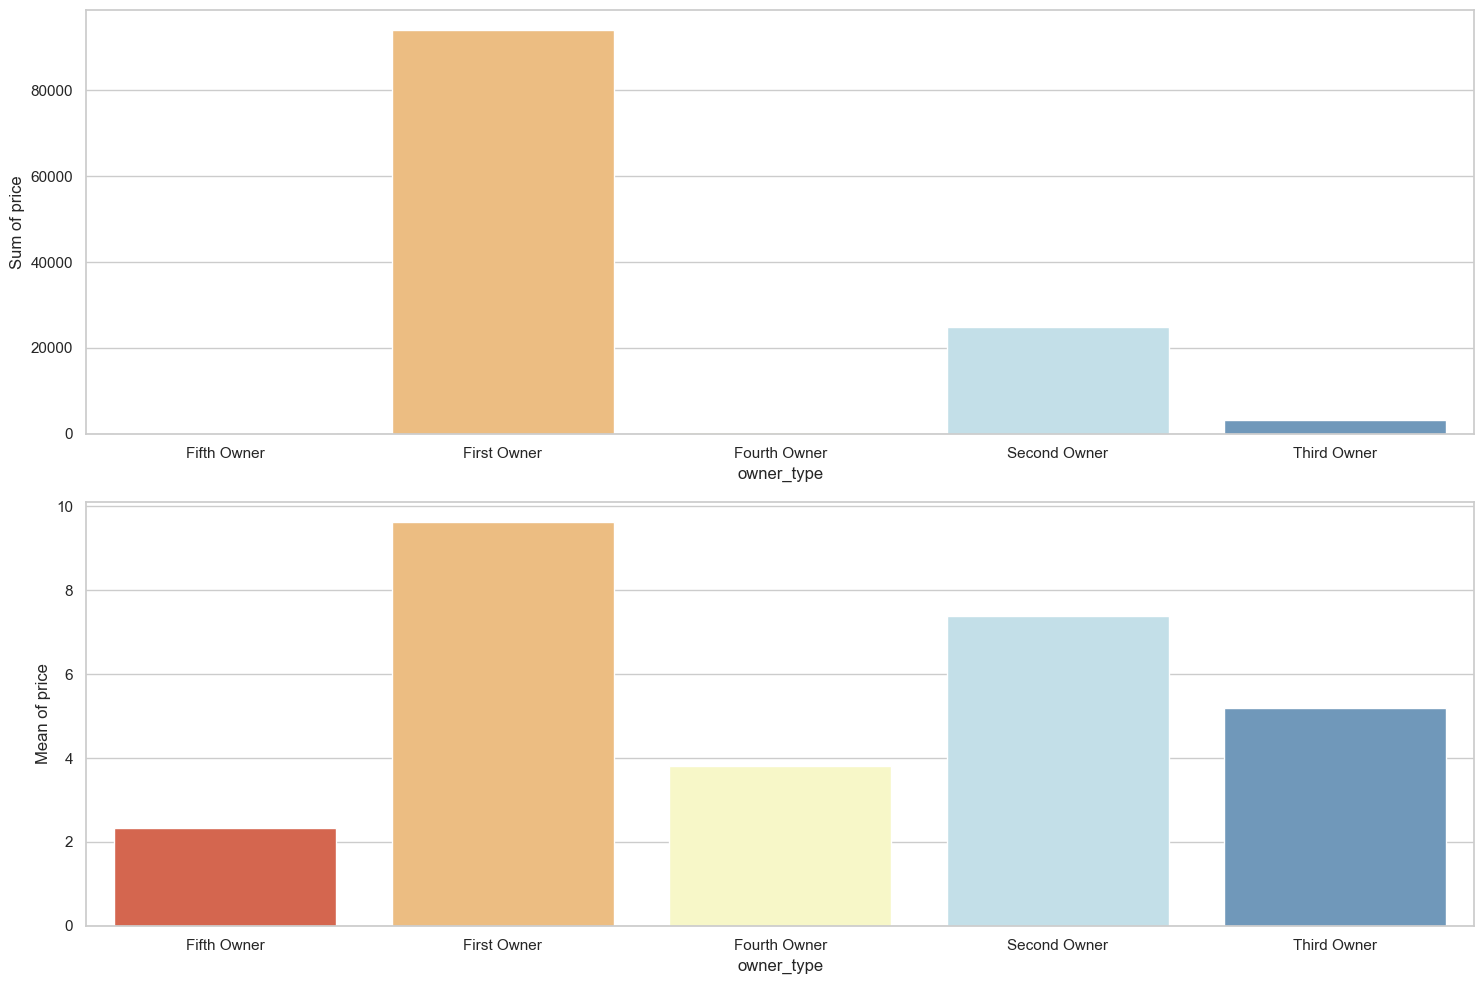

In [112]:
insu_df = df.groupby("owner_type")["resale_price_Lakh"].agg(["mean","sum"]).reset_index()
fig , ax = plt.subplots(2,1,figsize = (15,10))
ax1 = sns.barplot(x=insu_df["owner_type"],y=insu_df["sum"],ax=ax[0],palette="RdYlBu")
ax1.set_ylabel("Sum of price")
ax2 = sns.barplot(x=insu_df["owner_type"],y=insu_df["mean"],ax=ax[1],palette="RdYlBu")
ax2.set_ylabel("Mean of price")
plt.tight_layout()

C:\Users\letic\AppData\Local\Temp\ipykernel_20392\848152836.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(x = df["fuel_type"],palette="RdYlBu")


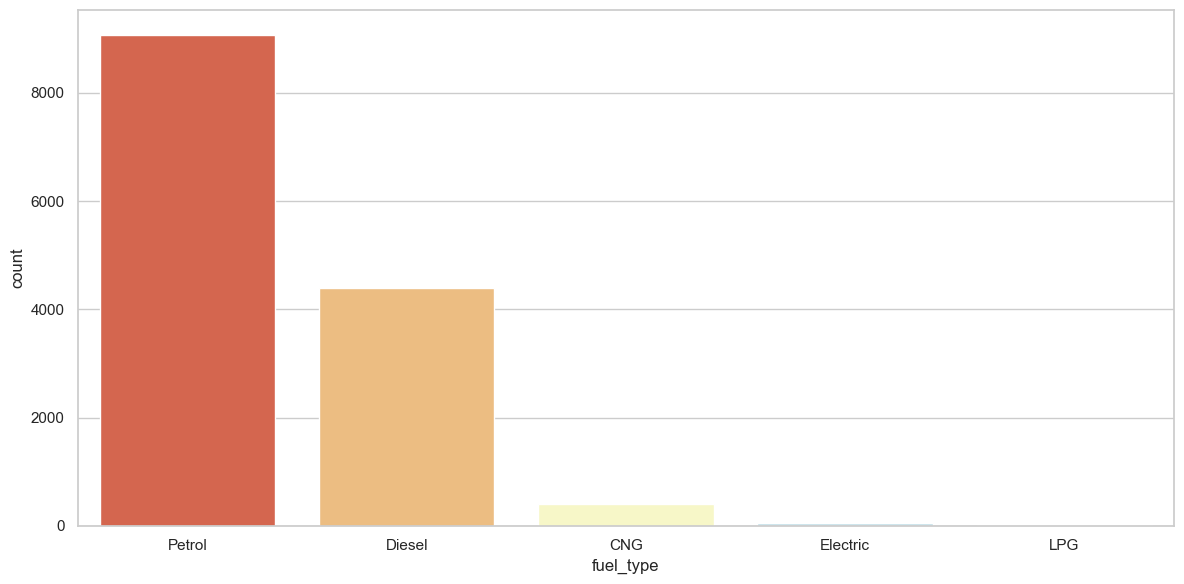

In [113]:
plt.figure(figsize=(12,6))
a = sns.countplot(x = df["fuel_type"],palette="RdYlBu")
plt.tight_layout()

C:\Users\letic\AppData\Local\Temp\ipykernel_20392\3882312284.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=insu_df["fuel_type"],y=insu_df["sum"],ax=ax[0],palette="RdYlBu")


C:\Users\letic\AppData\Local\Temp\ipykernel_20392\3882312284.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=insu_df["fuel_type"],y=insu_df["mean"],ax=ax[1],palette="RdYlBu")


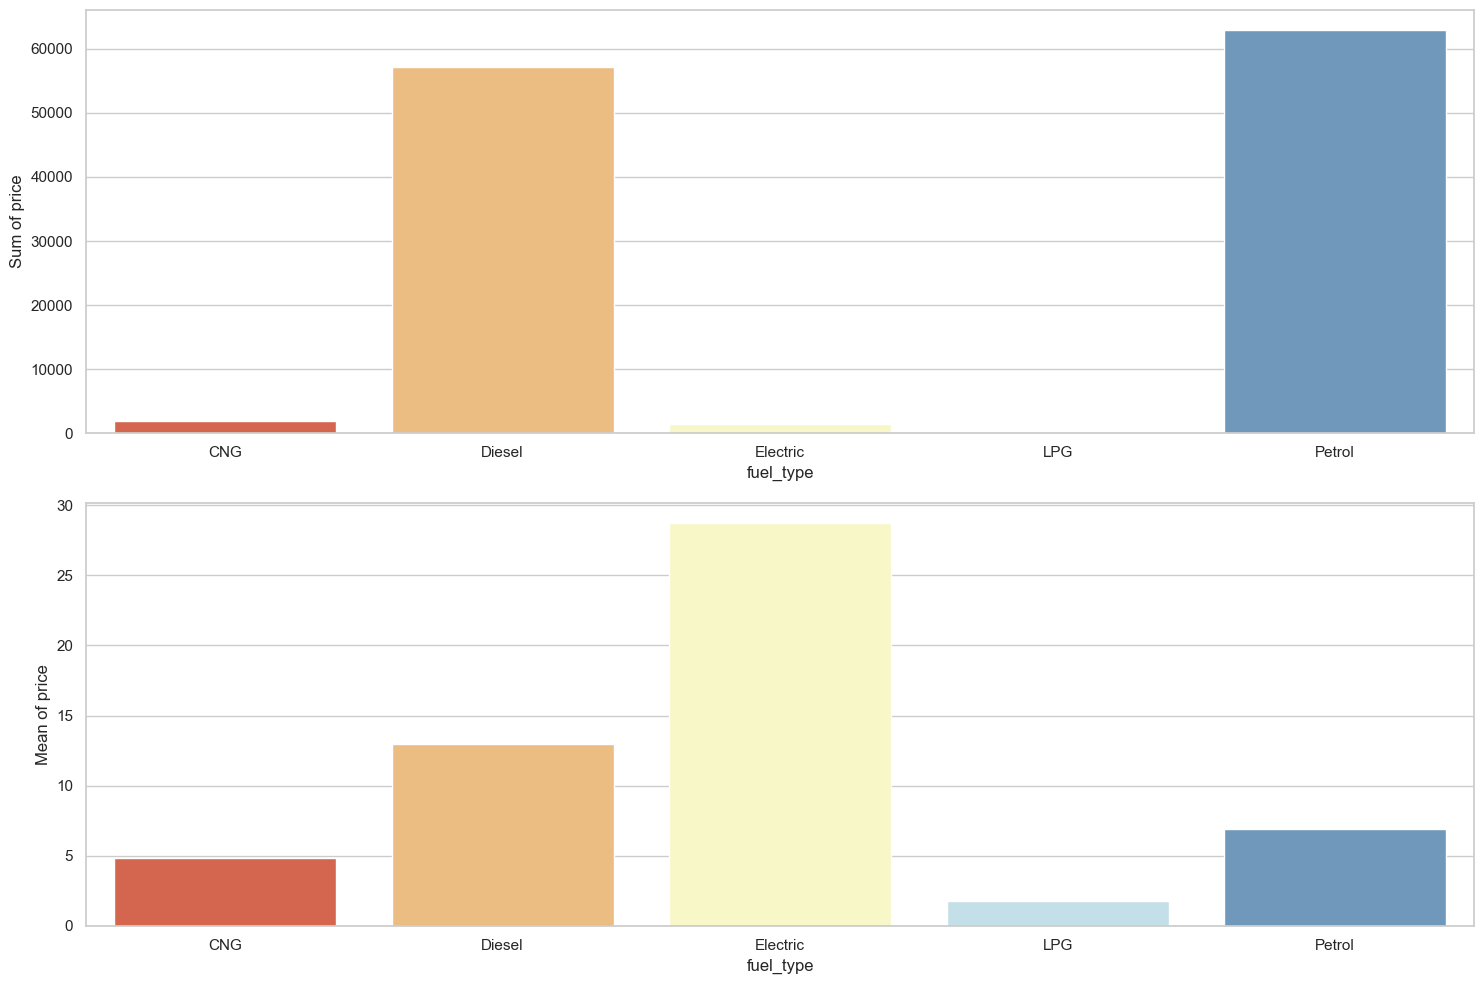

In [114]:
insu_df = df.groupby("fuel_type")["resale_price_Lakh"].agg(["mean","sum"]).reset_index()
fig , ax = plt.subplots(2,1,figsize = (15,10))
ax1 = sns.barplot(x=insu_df["fuel_type"],y=insu_df["sum"],ax=ax[0],palette="RdYlBu")
ax1.set_ylabel("Sum of price")
ax2 = sns.barplot(x=insu_df["fuel_type"],y=insu_df["mean"],ax=ax[1],palette="RdYlBu")
ax2.set_ylabel("Mean of price")
plt.tight_layout()

C:\Users\letic\AppData\Local\Temp\ipykernel_20392\3926344323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(x = df["city"],palette="RdYlBu")


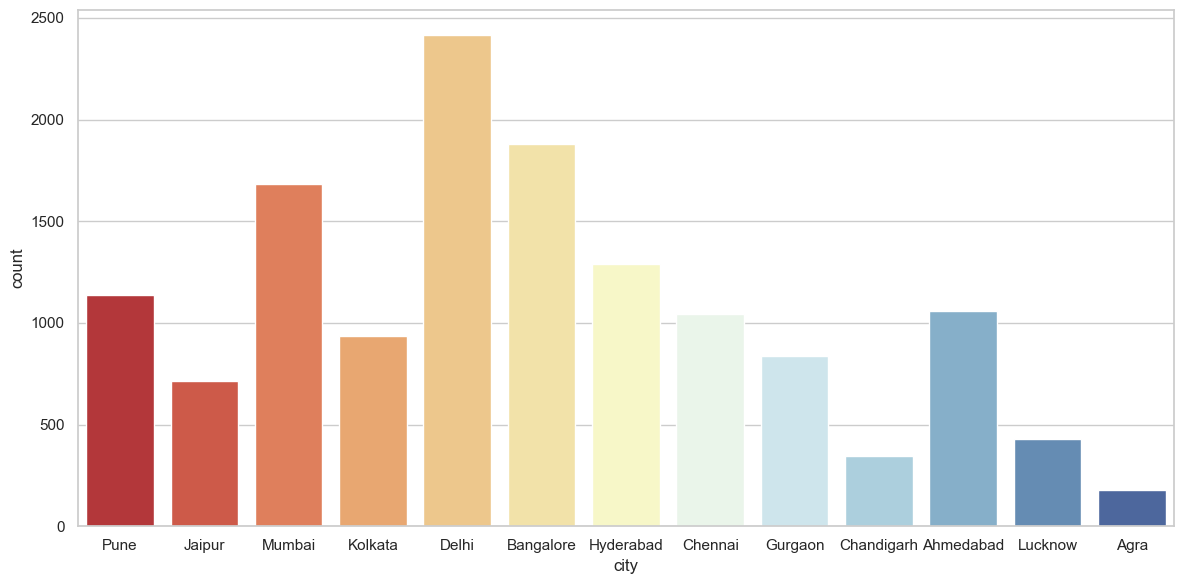

In [115]:
plt.figure(figsize=(12,6))
a = sns.countplot(x = df["city"],palette="RdYlBu")
plt.tight_layout()

C:\Users\letic\AppData\Local\Temp\ipykernel_20392\661445524.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=insu_df["city"],y=insu_df["sum"],ax=ax[0],palette="RdYlBu")
C:\Users\letic\AppData\Local\Temp\ipykernel_20392\661445524.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=insu_df["city"],y=insu_df["mean"],ax=ax[1],palette="RdYlBu")


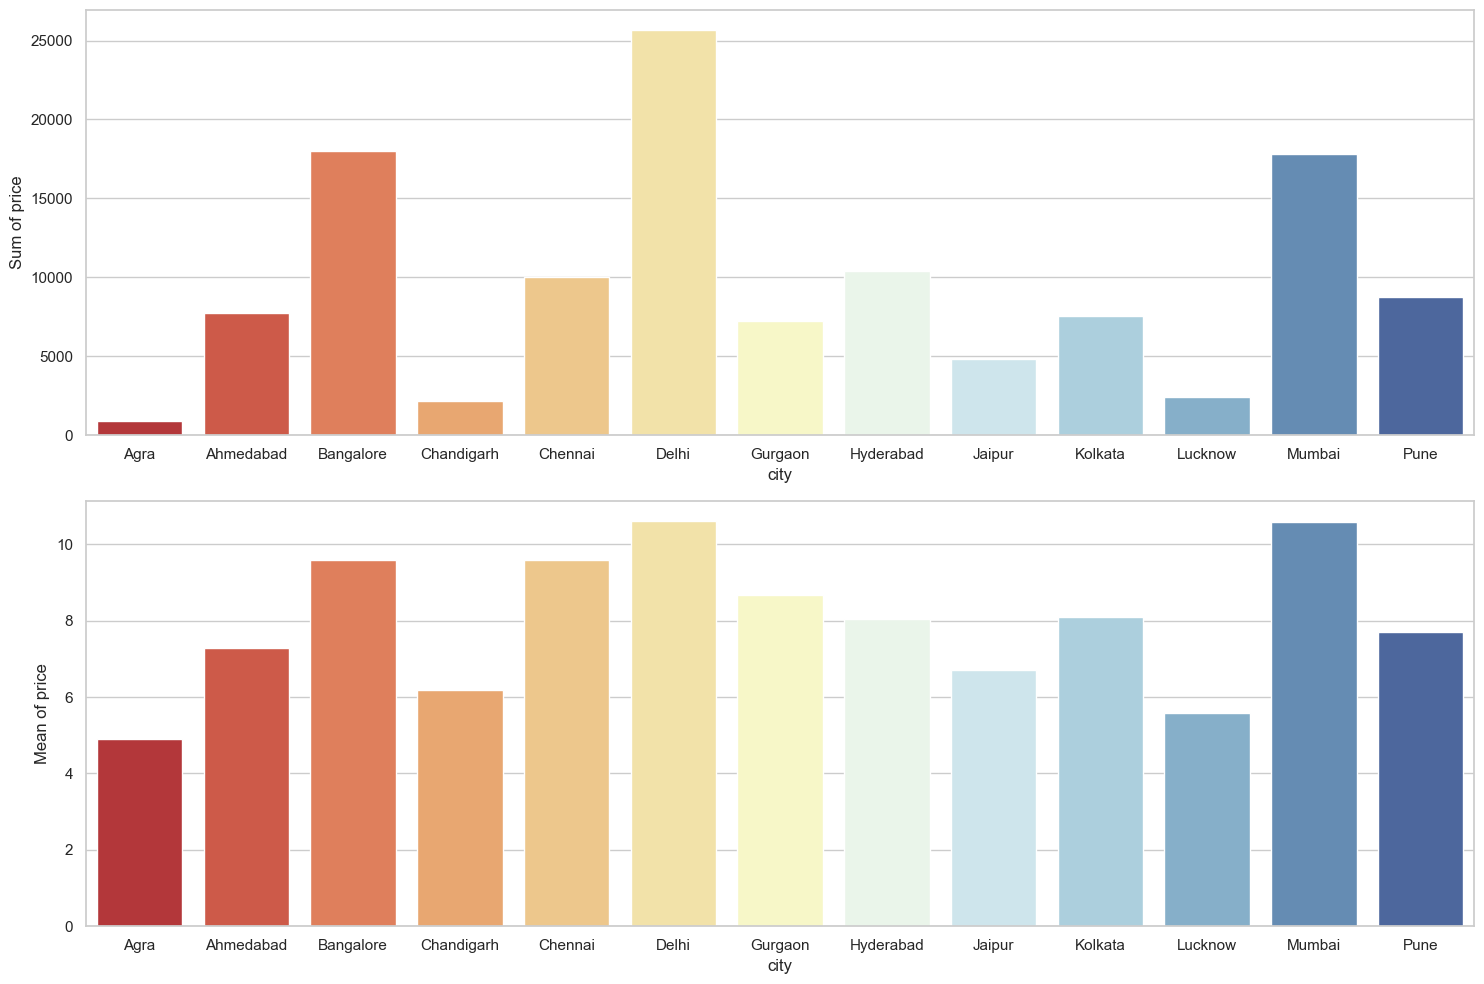

In [116]:
insu_df = df.groupby("city")["resale_price_Lakh"].agg(["mean","sum"]).reset_index()
fig , ax = plt.subplots(2,1,figsize = (15,10))
ax1 = sns.barplot(x=insu_df["city"],y=insu_df["sum"],ax=ax[0],palette="RdYlBu")
ax1.set_ylabel("Sum of price")
ax2 = sns.barplot(x=insu_df["city"],y=insu_df["mean"],ax=ax[1],palette="RdYlBu")
ax2.set_ylabel("Mean of price")
plt.tight_layout()

C:\Users\letic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\letic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\letic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0;

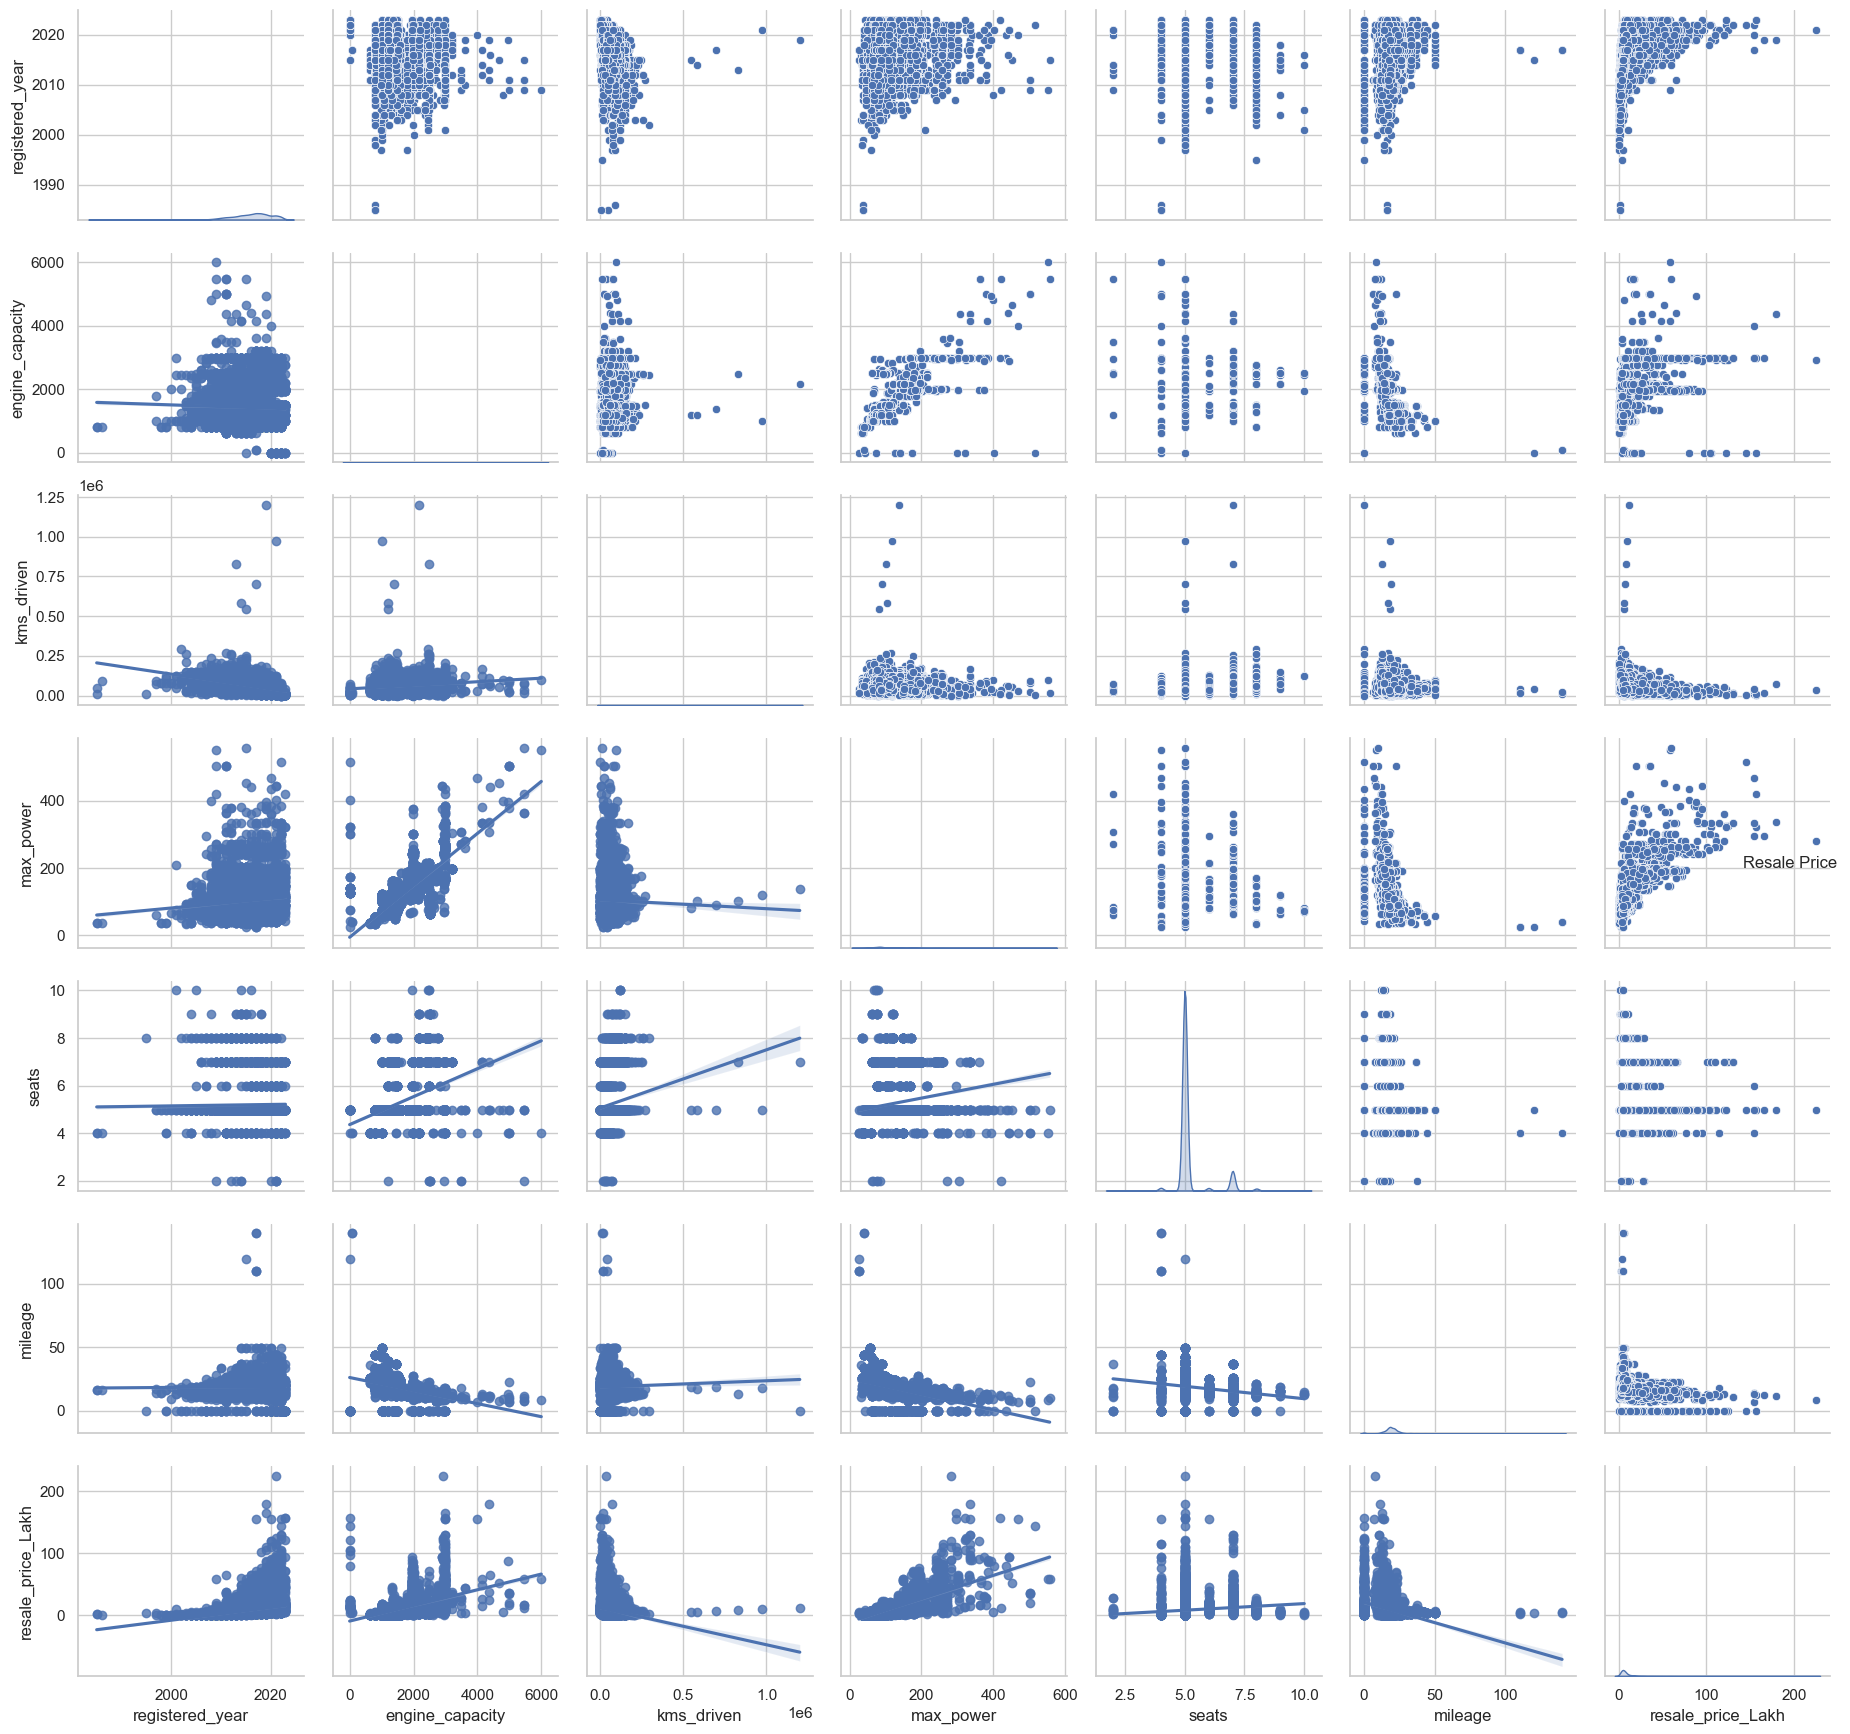

In [117]:
my_plot = sns.PairGrid(df)
my_plot = my_plot.map_diag(sns.kdeplot, shade=True)
my_plot = my_plot.map_lower(sns.regplot)
my_plot = my_plot.map_upper(sns.scatterplot).add_legend(title='Resale Price')
plt.tight_layout()

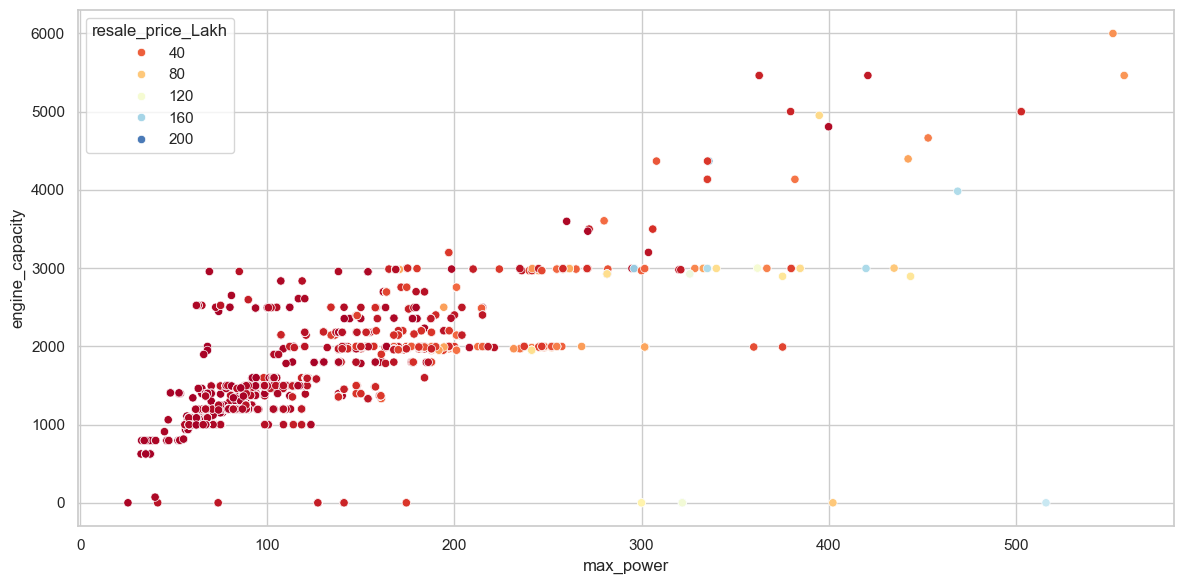

In [118]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = df["max_power"],y=df["engine_capacity"],hue=df["resale_price_Lakh"],palette="RdYlBu")
plt.tight_layout()

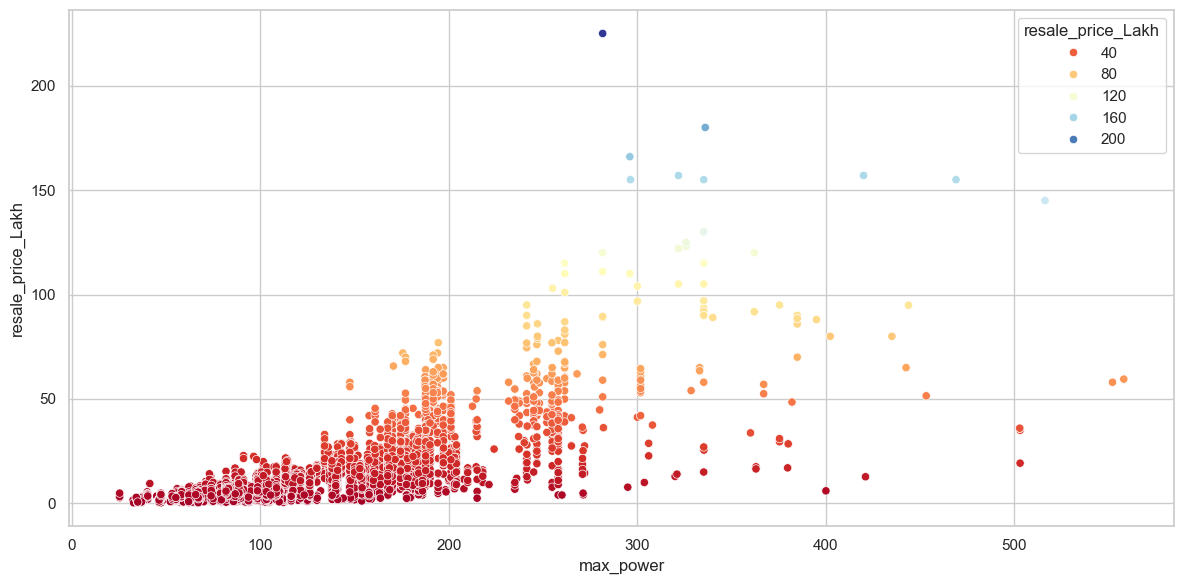

In [119]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = df["max_power"],y=df["resale_price_Lakh"],hue=df["resale_price_Lakh"],palette="RdYlBu")
plt.tight_layout()

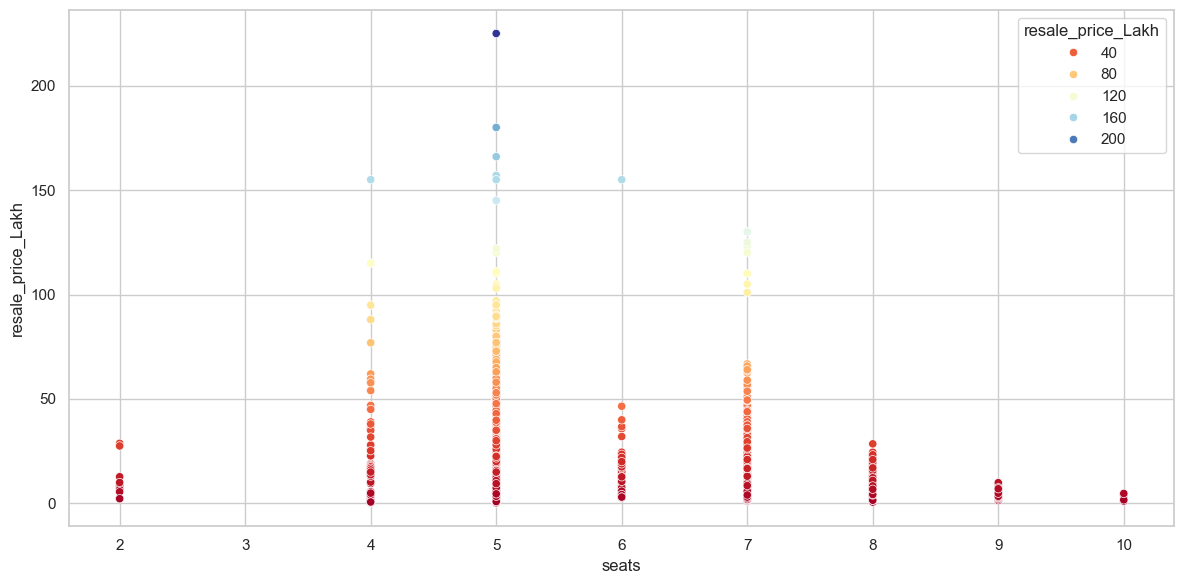

In [120]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = df["seats"],y=df["resale_price_Lakh"],hue=df["resale_price_Lakh"],palette="RdYlBu")
plt.tight_layout()

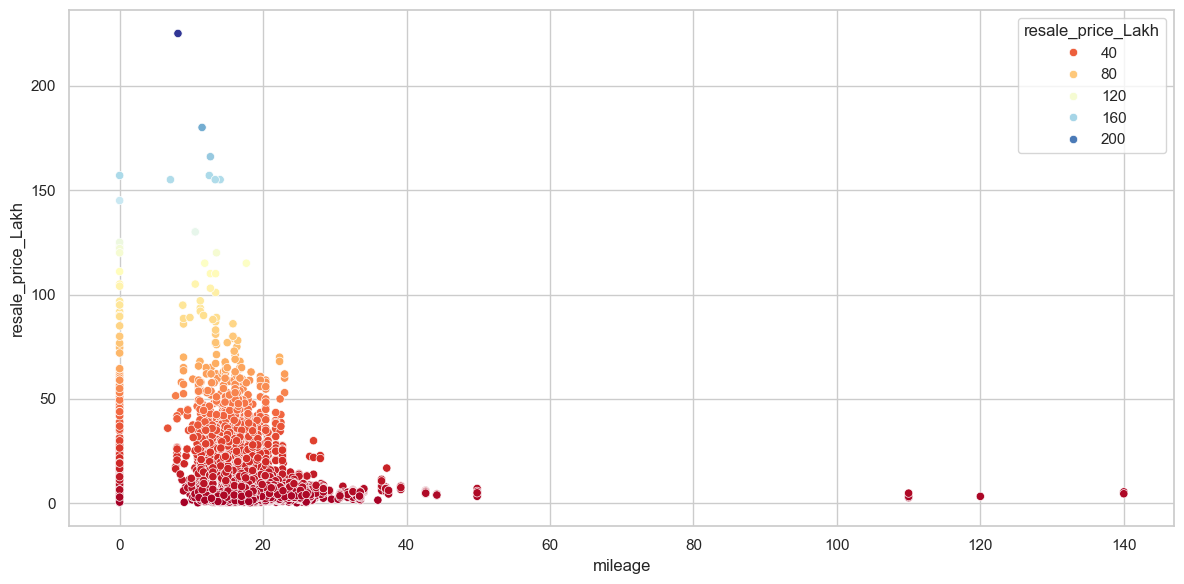

In [121]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = df["mileage"],y=df["resale_price_Lakh"],hue=df["resale_price_Lakh"],palette="RdYlBu")
plt.tight_layout()

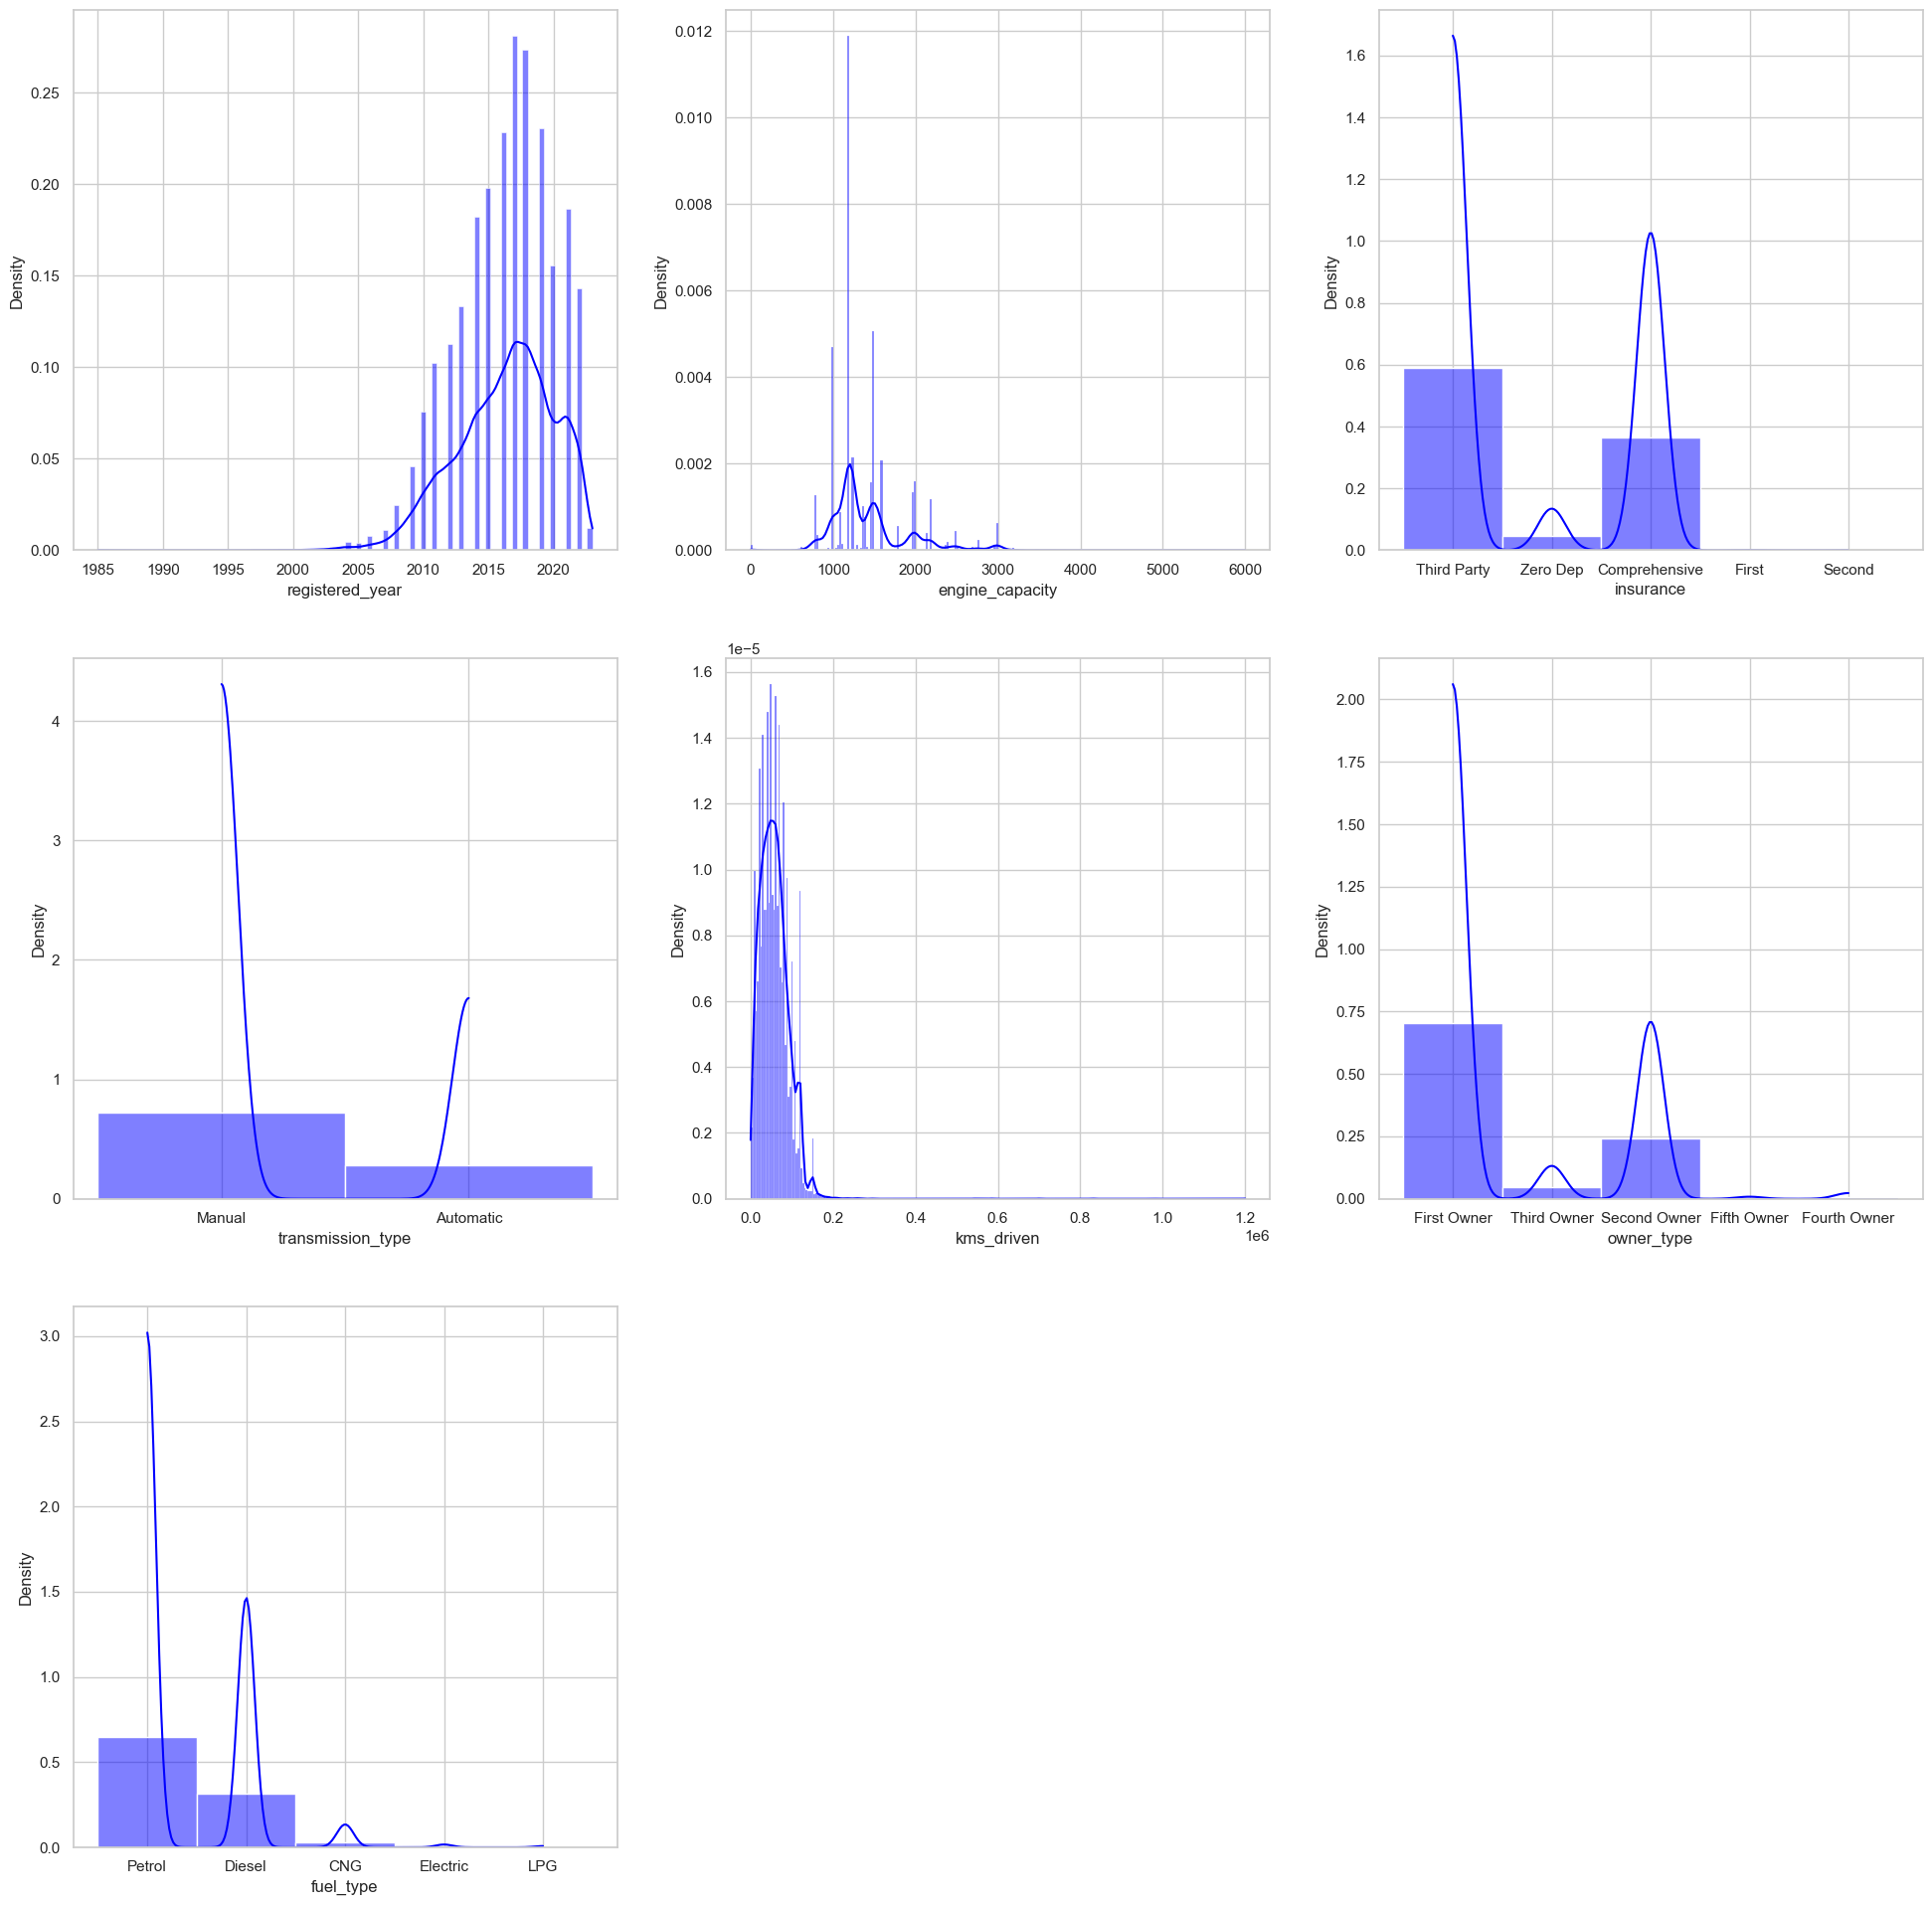

In [122]:

fig, ax1 = plt.subplots(3,3, figsize=(24,24))
k = 0
columns = list(col for col in df.columns if col != "full_name")
for i in range(3):
    for j in range(3):
            sns.histplot(df[columns[k]], ax = ax1[i][j], color = 'blue', kde=True, stat="density")
            k += 1
            if k > 6:
                break
    if k > 6:
                break
fig.delaxes(ax1[2,2]) # The indexing is zero-based here
fig.delaxes(ax1[2,1])
plt.show()


C:\Users\letic\AppData\Local\Temp\ipykernel_20392\4024774584.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[columns[col]], ax = ax1[i][j], orient='v',palette="RdYlBu")
C:\Users\letic\AppData\Local\Temp\ipykernel_20392\4024774584.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[columns[col]], ax = ax1[i][j], orient='v',palette="RdYlBu")
C:\Users\letic\AppData\Local\Temp\ipykernel_20392\4024774584.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[columns[col]], ax = ax1[i][j], orient='v',palette="RdYlBu")
C:\Users\l

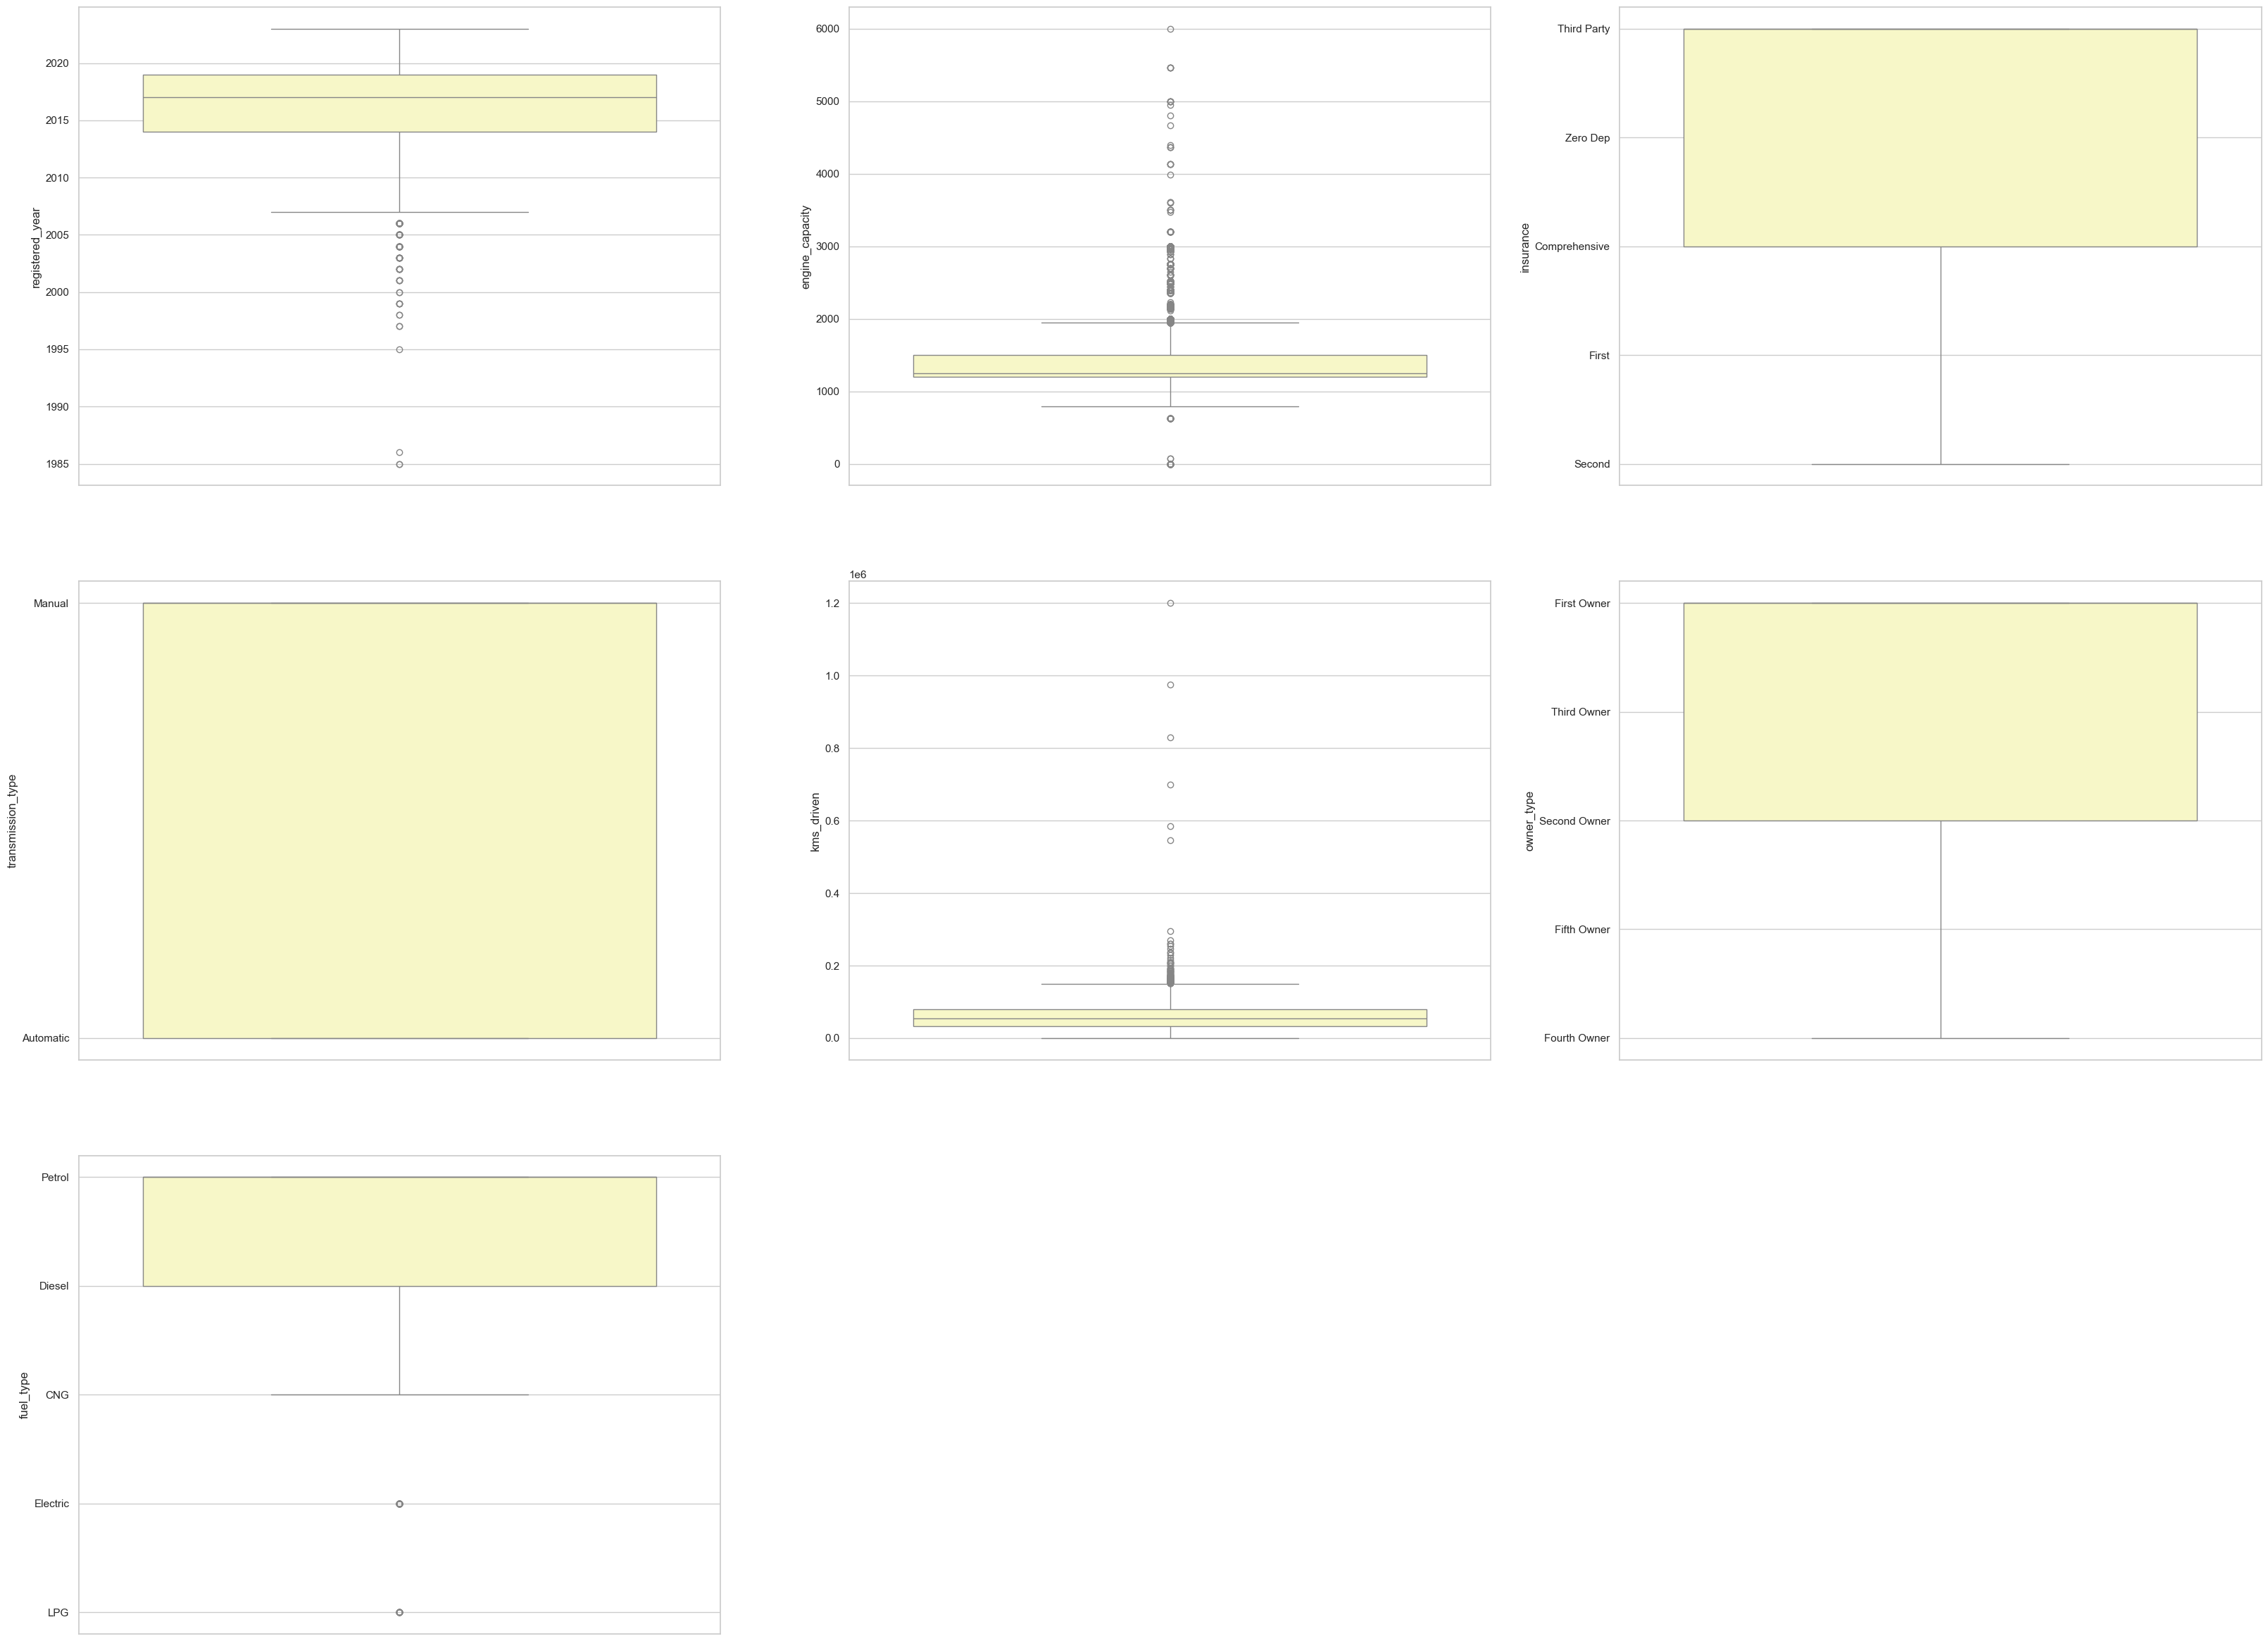

In [123]:
sns.set(style="whitegrid")
fig, ax1 = plt.subplots(3,3, figsize=(40,30))
col = 0
for i in range(3):
    for j in range(3):
            sns.boxplot( y=df[columns[col]], ax = ax1[i][j], orient='v',palette="RdYlBu")
            col += 1
            if col > 6:
                break
    if col > 6:
                break
            
fig.delaxes(ax1[2,2]) 
fig.delaxes(ax1[2,1])
plt.show()

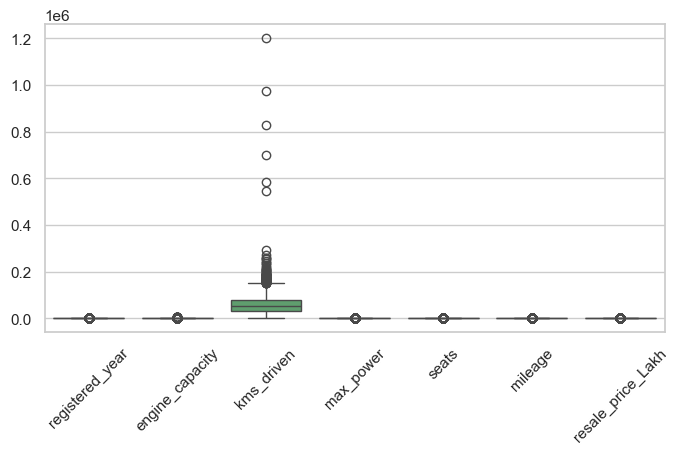

In [124]:
fig = plt.figure(figsize = (8,4))
plt.xticks(rotation = 45)
sns.set(style="whitegrid")
sns.boxplot(data=df[df.columns])
plt.show()

In [74]:
# Check data types
data_types = df.dtypes
print("Data type by column:")
print(data_types)

Data type by column:
full_name             object
registered_year        int64
engine_capacity      float64
insurance             object
transmission_type     object
kms_driven           float64
owner_type            object
fuel_type             object
max_power            float64
seats                float64
mileage              float64
body_type             object
city                  object
resale_price_Lakh    float64
marca                 object
dtype: object


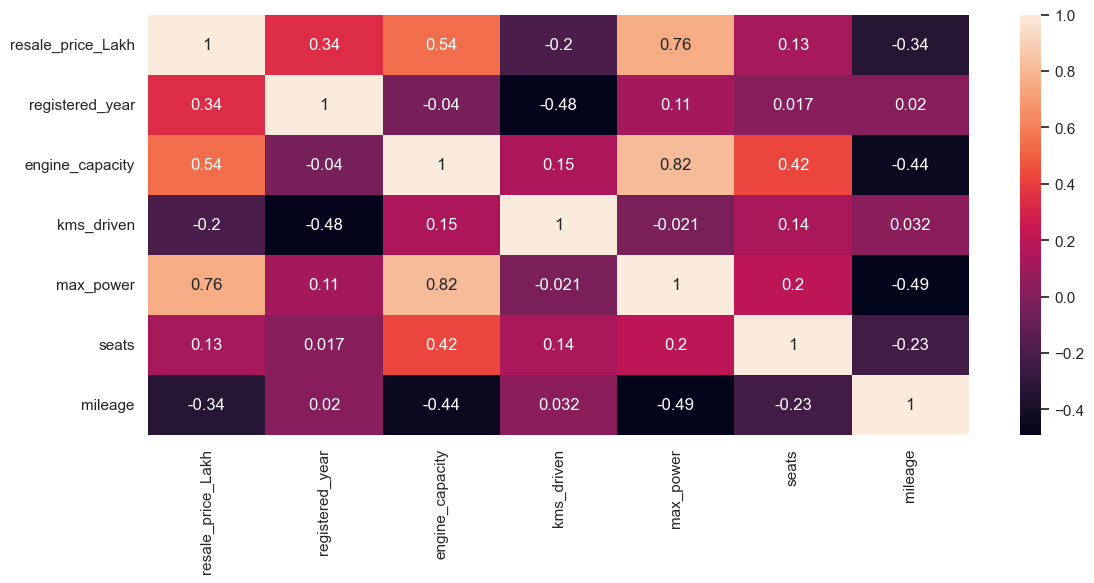

In [134]:
corr_df = df[["resale_price_Lakh","registered_year","engine_capacity","kms_driven","max_power","seats","mileage"]]
plt.figure(figsize=(12,6))
sns.heatmap(corr_df.corr(),annot=True)
plt.tight_layout()

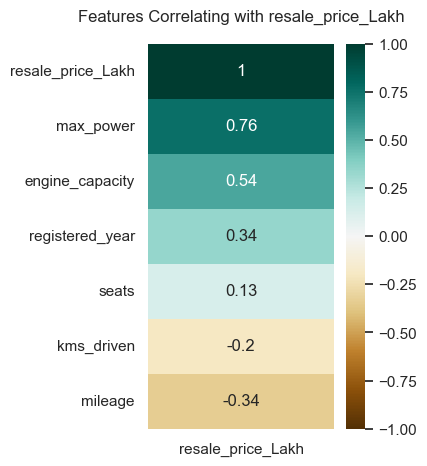

In [136]:

columns_of_interest = ['resale_price_Lakh','registered_year','engine_capacity','kms_driven','max_power','seats','mileage']
subset_df = df[columns_of_interest]

plt.figure(figsize=(3, 5))


heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 12}, pad=16)

plt.show()